# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score


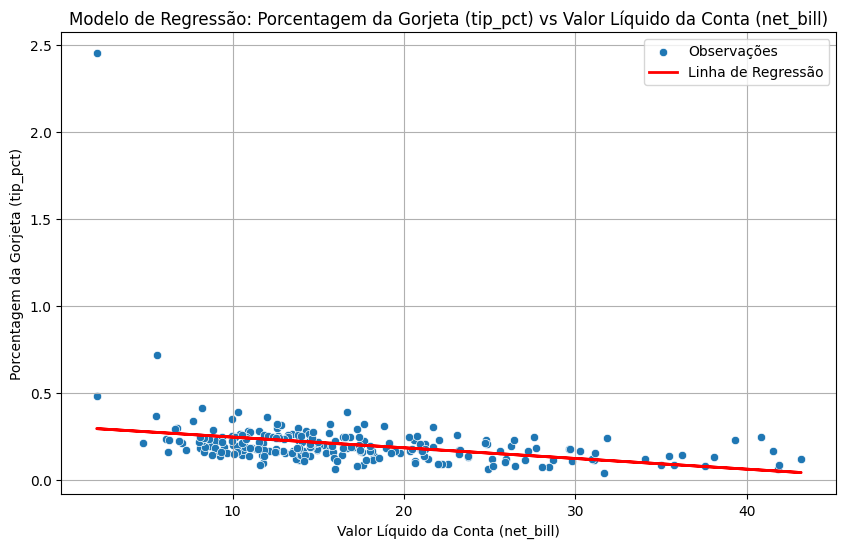

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        18:11:50   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3053      0.023     13.166      0.0

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

X = tips['net_bill']
y = tips['tip_pct']
X = sm.add_constant(X)  # Adiciona a constante ao modelo
model = sm.OLS(y, X).fit()  # Ajusta o modelo
tips['predicted_tip_pct'] = model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Observações')
plt.plot(tips['net_bill'], tips['predicted_tip_pct'], color='red', label='Linha de Regressão', linewidth=2)

plt.title('Modelo de Regressão: Porcentagem da Gorjeta (tip_pct) vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.legend()
plt.grid()
plt.show()

print(model.summary())

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [4]:
tips['log_net_bill'] = np.log(tips['net_bill'])


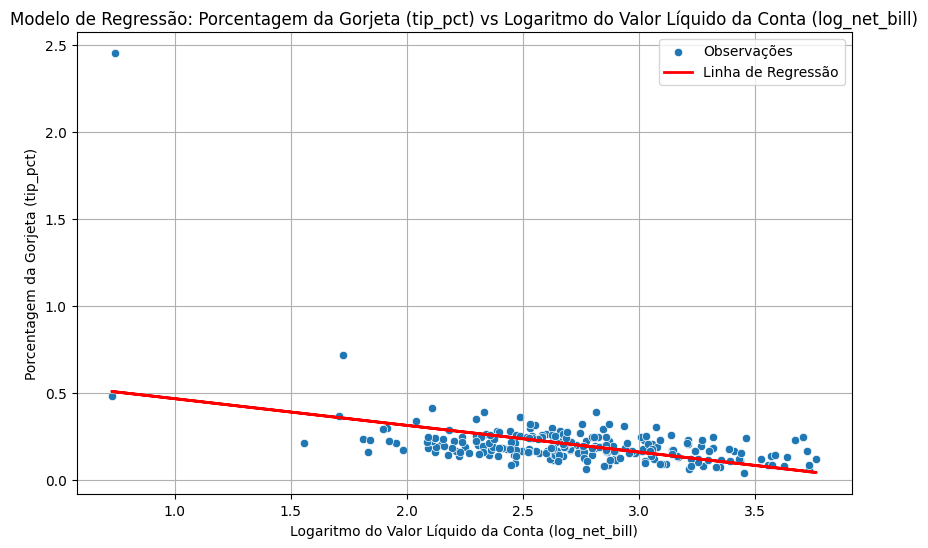

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.62e-13
Time:                        18:13:25   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6181      0.054     11.444   

In [5]:
# Definir X e y para o modelo
X = tips['log_net_bill']
y = tips['tip_pct']
X = sm.add_constant(X)  # Adicionar constante ao modelo

# Ajustar o modelo OLS
model_log = sm.OLS(y, X).fit()

# Predições para a variável tip_pct
tips['predicted_tip_pct_log'] = model_log.predict(X)

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips, label='Observações')
plt.plot(tips['log_net_bill'], tips['predicted_tip_pct_log'], color='red', label='Linha de Regressão', linewidth=2)

plt.title('Modelo de Regressão: Porcentagem da Gorjeta (tip_pct) vs Logaritmo do Valor Líquido da Conta (log_net_bill)')
plt.xlabel('Logaritmo do Valor Líquido da Conta (log_net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.legend()
plt.grid()
plt.show()

# Resumo do modelo
print(model_log.summary())

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [6]:
tips['net_bill_squared'] = tips['net_bill'] ** 2

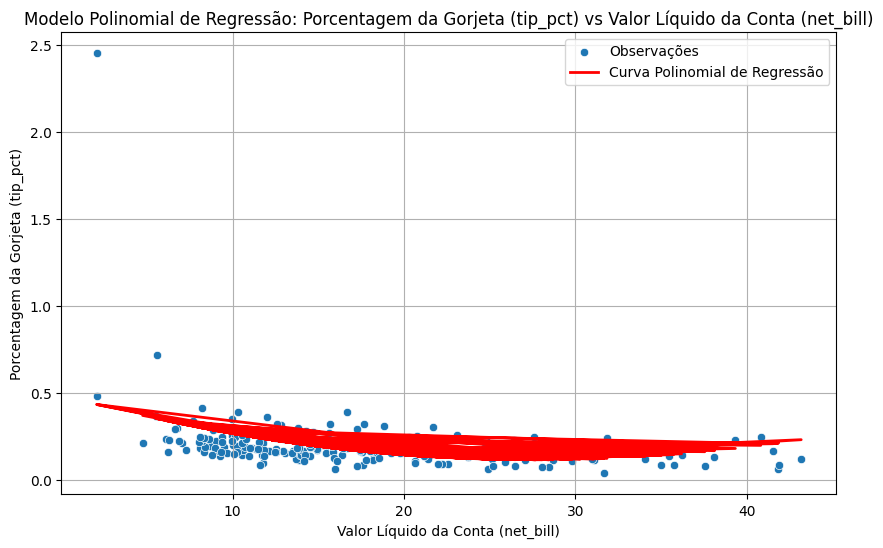

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.06e-09
Time:                        18:14:40   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

In [7]:
# Definir X e y para o modelo polinomial
X = tips[['net_bill', 'net_bill_squared']]
X = sm.add_constant(X)  # Adicionar constante ao modelo
y = tips['tip_pct']

# Ajustar o modelo OLS com polinômio de segundo grau
model_poly = sm.OLS(y, X).fit()

# Predições para a variável tip_pct
tips['predicted_tip_pct_poly'] = model_poly.predict(X)

# Gráfico de dispersão com curva de regressão polinomial
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Observações')
plt.plot(tips['net_bill'], tips['predicted_tip_pct_poly'], color='red', label='Curva Polinomial de Regressão', linewidth=2)

plt.title('Modelo Polinomial de Regressão: Porcentagem da Gorjeta (tip_pct) vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.legend()
plt.grid()
plt.show()

# Resumo do modelo
print(model_poly.summary())

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

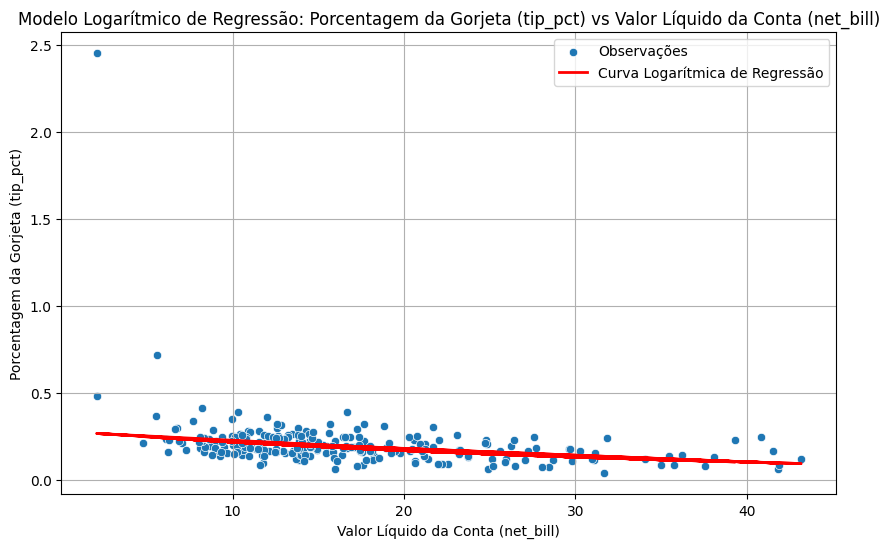

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           8.27e-16
Time:                        18:18:40   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2749      0.056    -22.872      0.0

In [12]:
# Aplicar logaritmo em tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Definir X e y para o modelo logarítmico
X = tips[['net_bill']]
X = sm.add_constant(X)  # Adicionar constante ao modelo
y_log = tips['log_tip_pct']

# Ajustar o modelo OLS com log de tip_pct
model_log = sm.OLS(y_log, X).fit()

# Predições para log_tip_pct
tips['predicted_log_tip_pct'] = model_log.predict(X)

# Reverter a transformação logarítmica para obter os valores de tip_pct preditos
tips['predicted_tip_pct_log'] = np.exp(tips['predicted_log_tip_pct'])

# Gráfico de dispersão com linha de regressão logarítmica
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Observações')
plt.plot(tips['net_bill'], tips['predicted_tip_pct_log'], color='red', label='Curva Logarítmica de Regressão', linewidth=2)

plt.title('Modelo Logarítmico de Regressão: Porcentagem da Gorjeta (tip_pct) vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.legend()
plt.grid()
plt.show()

# Resumo do modelo logarítmico
print(model_log.summary())

# Calcular o R^2 no valor original de tip_pct
r2_original_scale = r2_score(tips['tip_pct'], tips['predicted_tip_pct_log'])
print(f'R^2 no valor original de tip_pct: {r2_original_scale:.4f}')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

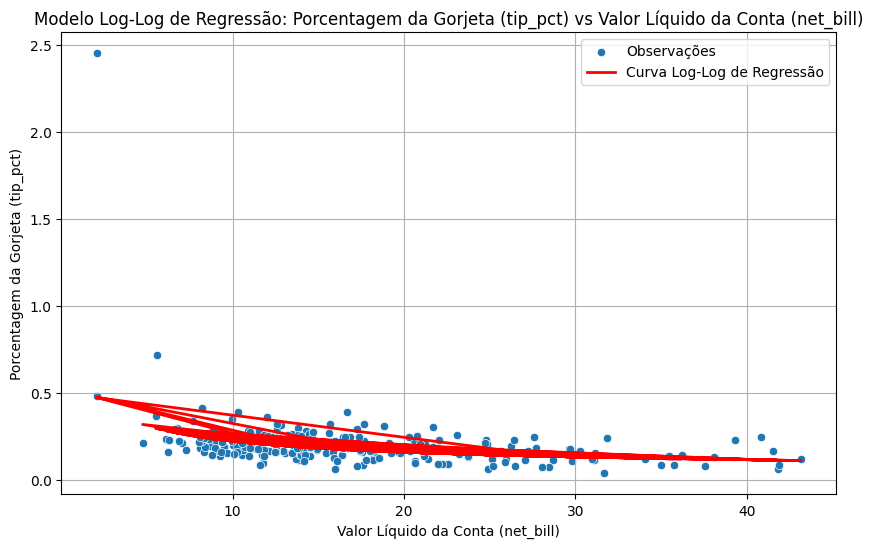

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.20e-20
Time:                        18:17:08   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3942      0.133     -2.961   

In [11]:
# Aplicar logaritmo em tip_pct e net_bill
tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

# Definir X e y para o modelo log-log
X_log = tips[['log_net_bill']]
X_log = sm.add_constant(X_log)  # Adicionar constante ao modelo
y_log = tips['log_tip_pct']

# Ajustar o modelo OLS com log de tip_pct e log de net_bill
model_log_log = sm.OLS(y_log, X_log).fit()

# Predições para log_tip_pct
tips['predicted_log_tip_pct_log_log'] = model_log_log.predict(X_log)

# Reverter a transformação logarítmica para obter os valores de tip_pct preditos
tips['predicted_tip_pct_log_log'] = np.exp(tips['predicted_log_tip_pct_log_log'])

# Gráfico de dispersão com linha de regressão log-log
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Observações')
plt.plot(tips['net_bill'], tips['predicted_tip_pct_log_log'], color='red', label='Curva Log-Log de Regressão', linewidth=2)

plt.title('Modelo Log-Log de Regressão: Porcentagem da Gorjeta (tip_pct) vs Valor Líquido da Conta (net_bill)')
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.legend()
plt.grid()
plt.show()

# Resumo do modelo log-log
print(model_log_log.summary())

# Calcular o R^2 no valor original de tip_pct
r2_original_scale_log_log = r2_score(tips['tip_pct'], tips['predicted_tip_pct_log_log'])
print(f'R^2 no valor original de tip_pct (Log-Log): {r2_original_scale_log_log:.4f}')

###  6. qual modelo resultou no melhor ajuste?

Modelo Log-Log de Regressão: Porcentagem da Gorjeta (tip_pct) vs Valor Líquido da Conta (net_bill).